# <span style="color:red">Coderschool</span> - SF Salaries Exercise 

Explore San Francisco city employee salary data.

## Overview

One way to understand how a city government works is by looking at who it employs and how its employees are compensated. This data contains the names, job title, and compensation for San Francisco city employees on an annual basis from 2011 to 2014.



Just follow along and complete the tasks outlined in bold below. The tasks will get harder and harder as you go along.

## Recap
[Imgur](https://i.imgur.com/BTOosvZ.jpg)
![alt recap](https://i.imgur.com/BTOosvZ.jpg)

**Import pandas as pd. Import seaborn as sns**

In [3]:
import pandas as pd
import seaborn as sns

**Read Salaries.csv as a dataframe called sal.**

In [6]:
sal = pd.read_csv('./Salaries.csv')# Your code here

**Check the head of the DataFrame.**

In [9]:
sal.head(1)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN


**Use the .info() method to find out how many entries there are.**

In [10]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148045 non-null float64
OvertimePay         148650 non-null float64
OtherPay            148650 non-null float64
Benefits            112491 non-null float64
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               0 non-null float64
Agency              148654 non-null object
Status              0 non-null float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


**What is the average BasePay ?**

Hint: 
- We have to select a column in dataset first and then apply a function for this column
- EXP: sal['Name_of_columns'].mean()
- [mean()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html) function

In [11]:
sal['BasePay'].mean()  # mean is AVG

66325.44884050643

**What is the lowest and highest amount of BasePay?**

Hint: 
[min()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.min.html) function , 
[max()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.max.html) function

In [12]:
sal['BasePay'].min()

-166.01

In [13]:
sal['BasePay'].max()

319275.01

**How about OvertimePay in the dataset? What is the average, lowest, highest amount?**

In [16]:
# Your code here
sal['OvertimePay'].mean()
sal['OvertimePay'].min()
sal['OvertimePay'].max()


245131.88

**What is the job title of  JOSEPH DRISCOLL ? Note: Use all caps, otherwise you may get an answer that doesn't match up (there is also a lowercase Joseph Driscoll).**
hint: 
- Create a Boolean Index
- Use Boolean Index to filter
- Ref: https://erikrood.com/Python_References/rows_cols_python.html

In [32]:
#sal[sal['EmployeeName'] == 'JOSEPH DRISCOLL']['JobTitle']
select_row = sal['EmployeeName'] == 'JOSEPH DRISCOLL'
sal[select_row]['JobTitle']

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object

In [30]:
# Now try to select Employes who have name "GARY JIMENEZ"
# Your code here
sal[sal['EmployeeName'] == 'GARY JIMENEZ']


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN


**How much does JOSEPH DRISCOLL make (including benefits)?**

In [33]:
sal[select_row]['TotalPayBenefits']


24    270324.91
Name: TotalPayBenefits, dtype: float64

**What is the name of highest paid person (including benefits)?**

In [35]:
hightestBenefits = sal['TotalPayBenefits'] == sal['TotalPayBenefits'].max()
sal[hightestBenefits]['EmployeeName']

0    NATHANIEL FORD
Name: EmployeeName, dtype: object

**What is the name of lowest paid person (including benefits)? Do you notice something strange about how much he or she is paid?**

In [45]:
lowestBenefits = sal['TotalPayBenefits'] == sal['TotalPayBenefits'].min()
sal[lowestBenefits]['EmployeeName']

148653    Joe Lopez
Name: EmployeeName, dtype: object

**What was the average (mean) BasePay of all employees per year? (2011-2014) ?**

In [51]:
#averagePerYear = {}
#averagePerYear["2011"] = sal[sal['Year'] == 2011].mean()
#averagePerYear["2012"] = sal[sal['Year'] == 2012].mean()
#averagePerYear["2013"] = sal[sal['Year'] == 2013].mean()
#averagePerYear["2014"] = sal[sal['Year'] == 2014].mean()

sal.groupby('Year').mean()['BasePay']

#print (str(test))

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

**How many unique job titles are there?**

In [68]:
sal['JobTitle'].nunique()


2159

**What are the top 5 most common jobs?**

In [72]:
sal['JobTitle'].value_counts()[:5]

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

**How many Job Titles were represented by only one person in 2013? (e.g. Job Titles with only one occurence in 2013?)**

In [93]:
(sal['JobTitle'][sal['Year'] == 2013].value_counts() == 1).sum()

202

**How many people have the word Chief in their job title? (This is pretty tricky)**

In [87]:
def check_chief(in_string):
    if "chief" in in_string.lower():
        return True
    return False
check_chief("Chief")

True

In [90]:
sal['JobTitle'].apply(check_chief).sum()

627

In [91]:
sal['JobTitle'].str.lower().str.contains('chief').sum()

627

## Data Visualization

**Implement seaborn's countplot with x='Year'**

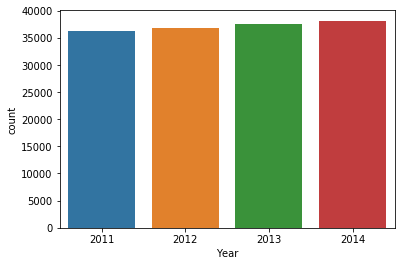

In [94]:
sns.countplot(x="Year", data=sal)

** Implement seaborn's distplot for BasePay of Year 2011 **

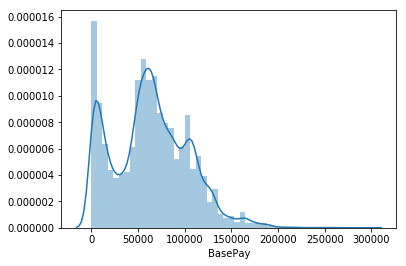

In [98]:
sns.distplot(sal[sal['Year'] == 2011]['BasePay']);

**How about other Year**

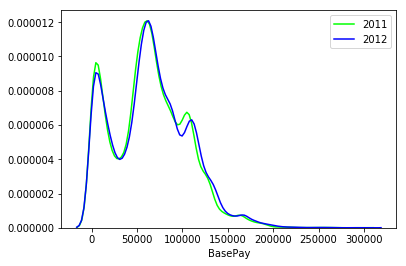

In [107]:
sns.distplot(sal[sal['Year'] == 2011]['BasePay'], label='2011', color='#00ff00' , hist = False);
sns.distplot(sal[sal['Year'] == 2012]['BasePay'], label='2012', color='#0000ff', hist = False);

**Visualize top 5 Jobs with BasePay, Benefits and OvertimePay**

In [111]:
# Get top 5 jobs, you did it before
# Your code here
top_5 = sal['JobTitle'].value_counts()[:5]
top_5

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

In [113]:
# Get name of top 5 jobs cause we want to filter out the others
# top_5 is an pd.series so name of it is in index
# Your code here
name_of_top_5 = top_5.index

In [118]:
# Now, it's time to select top 5 jobs
# Your code here
select_top_5 = sal['JobTitle'].isin(name_of_top_5)  # check all data where job is in name of top 5
# We just need mean value base on JobTitle so we groupby 'JobTitle' and apply mean()
# Your code here
top_5 = sal[select_top_5].groupby('JobTitle').mean()


In [119]:
# Let's see we got now
# Your code here
top_5.head()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
JobTitle,,,,,,,,,,
Police Officer 3,79009.017348,108508.662621,16418.062615,10428.363371,32829.713693,134906.890909,167736.604601,2012.966543,NaN,NaN
Public Svc Aide-Public Works,109674.599285,8091.876070,60.017744,103.270087,1379.748050,8242.309452,9622.057502,2013.068705,NaN,NaN
Registered Nurse,82183.598501,102650.396486,4204.840575,9147.593983,35950.834170,115700.594866,151651.429036,2012.990096,NaN,NaN
Special Nurse,102828.995215,29929.166718,651.723372,2628.778551,3210.342240,33161.934723,36372.276963,2013.002734,NaN,NaN
Transit Operator,93992.083997,51772.154465,11143.260866,2244.580567,27355.597533,64711.146917,92066.744450,2013.030841,NaN,NaN


In [122]:
# To make the plot job easy and nice, we only keep needed columns ['BasePay', 'Benefits', 'OvertimePay' ]
# One more thing, to select more than one column at a time, we use this syntax
# sal[['name', 'list', 'of', 'coloums', 'here']]
# Your code here
top_5 = top_5[['BasePay', 'Benefits', 'OvertimePay']]
top_5.head()

,BasePay,Benefits,OvertimePay
JobTitle,,,
Police Officer 3,108508.662621,32829.713693,16418.062615
Public Svc Aide-Public Works,8091.876070,1379.748050,60.017744
Registered Nurse,102650.396486,35950.834170,4204.840575
Special Nurse,29929.166718,3210.342240,651.723372
Transit Operator,51772.154465,27355.597533,11143.260866


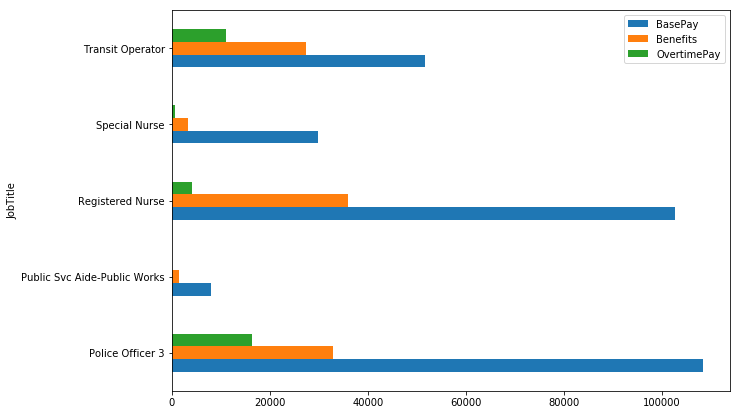

In [123]:
# Ready to plot
top_5.plot(kind='barh', figsize=(10,7))

# Great Job!